# Fluidize-Python Interactive Demo

This notebook demonstrates the fluidize-python library for managing scientific computing projects.

## Setup

First, let's import the client and see where our projects will be stored:

In [6]:
# Import the fluidize client - handlers auto-register!
from fluidize.client import FluidizeClient

# Create client and config
client = FluidizeClient(mode="local")

print(f"📁 Projects will be stored in: {client.config.local_projects_path}")
print(f"📁 Base directory: {client.config.local_base_path}")
print(f"🚀 Client ready in '{client.mode}' mode!")

📁 Projects will be stored in: /Users/henrybae/.fluidize/projects
📁 Base directory: /Users/henrybae/.fluidize
🚀 Client ready in 'local' mode!


In [11]:
# Download MUJOCO example from Google Cloud Storage
import urllib.request
import zipfile
from pathlib import Path

# Skip if already exists
destination = client.config.local_projects_path / "MUJOCO"
if destination.exists():
    print(f"✅ MUJOCO already exists at: {destination}")
else:
    print("📥 Downloading MUJOCO example...")

    # Download and extract
    urllib.request.urlretrieve("https://storage.googleapis.com/fluidize-examples/MUJOCO.zip", "MUJOCO.zip")
    with zipfile.ZipFile("MUJOCO.zip", "r") as zip_ref:
        zip_ref.extractall(client.config.local_projects_path)
    Path("MUJOCO.zip").unlink()  # Clean up

    print(f"✅ Example Project Downloaded at: {destination}")

📥 Downloading MUJOCO example...
✅ Example Project Downloaded at: /Users/henrybae/.fluidize/projects/MUJOCO


We now load a project. This contains everything we need to run a simulation pipeline!

In [12]:
# Get our MUJOCO project for node creation
project = client.projects.get("MUJOCO")

print(f"🎯 Working with project: {project.label}")
print(f"📊 Current graph state: {len(project.graph.get().nodes)} nodes, {len(project.graph.get().edges)} edges")

🎯 Working with project: MUJOCO DEMO
📊 Current graph state: 1 nodes, 0 edges


We now list the parameters that we can tune for this simulation. Here to make it simple, we just have one, which will see in a bit!

In [13]:
print(project.graph.show_parameters("Mujoco-Simulation"))

Parameters for node 'Mujoco-Simulation':

Parameter 1:
  Name: motor_strength
  Value: 20.0
  Description: Control signal strength for bat motor (higher = faster swing, more collision force)
  Type: text
  Label: Motor Strength
  Scope: simulation
  Location: source/pinata_simulation.py, source/pinata_simulation.py, source/pinata_simulation.py, source/pinata_simulation.py


## Example Run

We now run the simulation. The payload here is for you to describe what this run was. All the things like parameters and your source code is automatically tracked for each run. This takes a few minutes at first because the Docker image needs to be installed on your local machine (for the local version)

In [ ]:
from fluidize.core.types.runs import RunFlowPayload

# Just providing information about what the run is
payload = RunFlowPayload(
    name="simulation-run-1", description="Running with Velocity 20", tags=["simulation", "analysis"]
)


result = project.runs.run_flow(payload)
run_number = result["run_number"]

No start node provided, using first node: Mujoco-Simulation
BFS traversal starting from node 'Mujoco-Simulation':
  - Adding node to traversal: Mujoco-Simulation, previous node: None
Nodes to run: ['Mujoco-Simulation']
Created project run folder: /Users/henrybae/.fluidize/projects/MUJOCO/runs/run_1
Created run environment with number: 1


No parameters.json found for node Mujoco-Simulation


Executing node Mujoco-Simulation in run 1

=== Starting run for node: Mujoco-Simulation ===
1. Preparing environment...
🔧 [Environment] Processing 1 targeted files (vs exhaustive search)
📝 [Environment] Updated parameters in: source/pinata_simulation.py
2. Executing simulation...
3. Handling files...
=== Run completed for node: Mujoco-Simulation with result: True ===



## 4. Looking at Results

We can now list the location of the node output. The nice thing about this configuration is that there is no guesswork involved in figuring out where your files are saved. In this case we want to see the output for the example Mujoco simulation.

In [15]:
# List all output files from the latest run
node_id = "Mujoco-Simulation"

# Get list of output files
output_files = project.runs.list_node_outputs(run_number, node_id)
print(f"📂 Output files from run {run_number}:")
for file in output_files:
    print(f"  - {file}")

# Get the output path
output_path = project.runs.get_output_path(run_number, node_id)
print(f"\n📁 Output directory: {output_path}")
print(f"Directory exists: {output_path.exists()}")

📂 Output files from run 1:
  - videos/pinata_simulation_20250814_034824.mp4
  - logs/simulation_log_20250814_034824.txt
  - data/sensor_data_20250814_034824.csv
  - data/simulation_data_20250814_034824.npz
  - plots/comprehensive_analysis_20250814_034824.png

📁 Output directory: /Users/henrybae/.fluidize/projects/MUJOCO/runs/run_1/outputs/Mujoco-Simulation
Directory exists: True


This is just code for visualizing your results. The files are all there, so you can use any tool you like in Python (or anywhere else by making another Fluidize node) to view the results of your simulation run. 

📊 Results from Run 1 - Node: Mujoco-Simulation
📂 Output files:
  - videos/pinata_simulation_20250814_034824.mp4
  - logs/simulation_log_20250814_034824.txt
  - data/sensor_data_20250814_034824.csv
  - data/simulation_data_20250814_034824.npz
  - plots/comprehensive_analysis_20250814_034824.png

📁 Output directory: /Users/henrybae/.fluidize/projects/MUJOCO/runs/run_1/outputs/Mujoco-Simulation
Directory exists: True

🖼️  Displaying images:
📷 plots/comprehensive_analysis_20250814_034824.png:


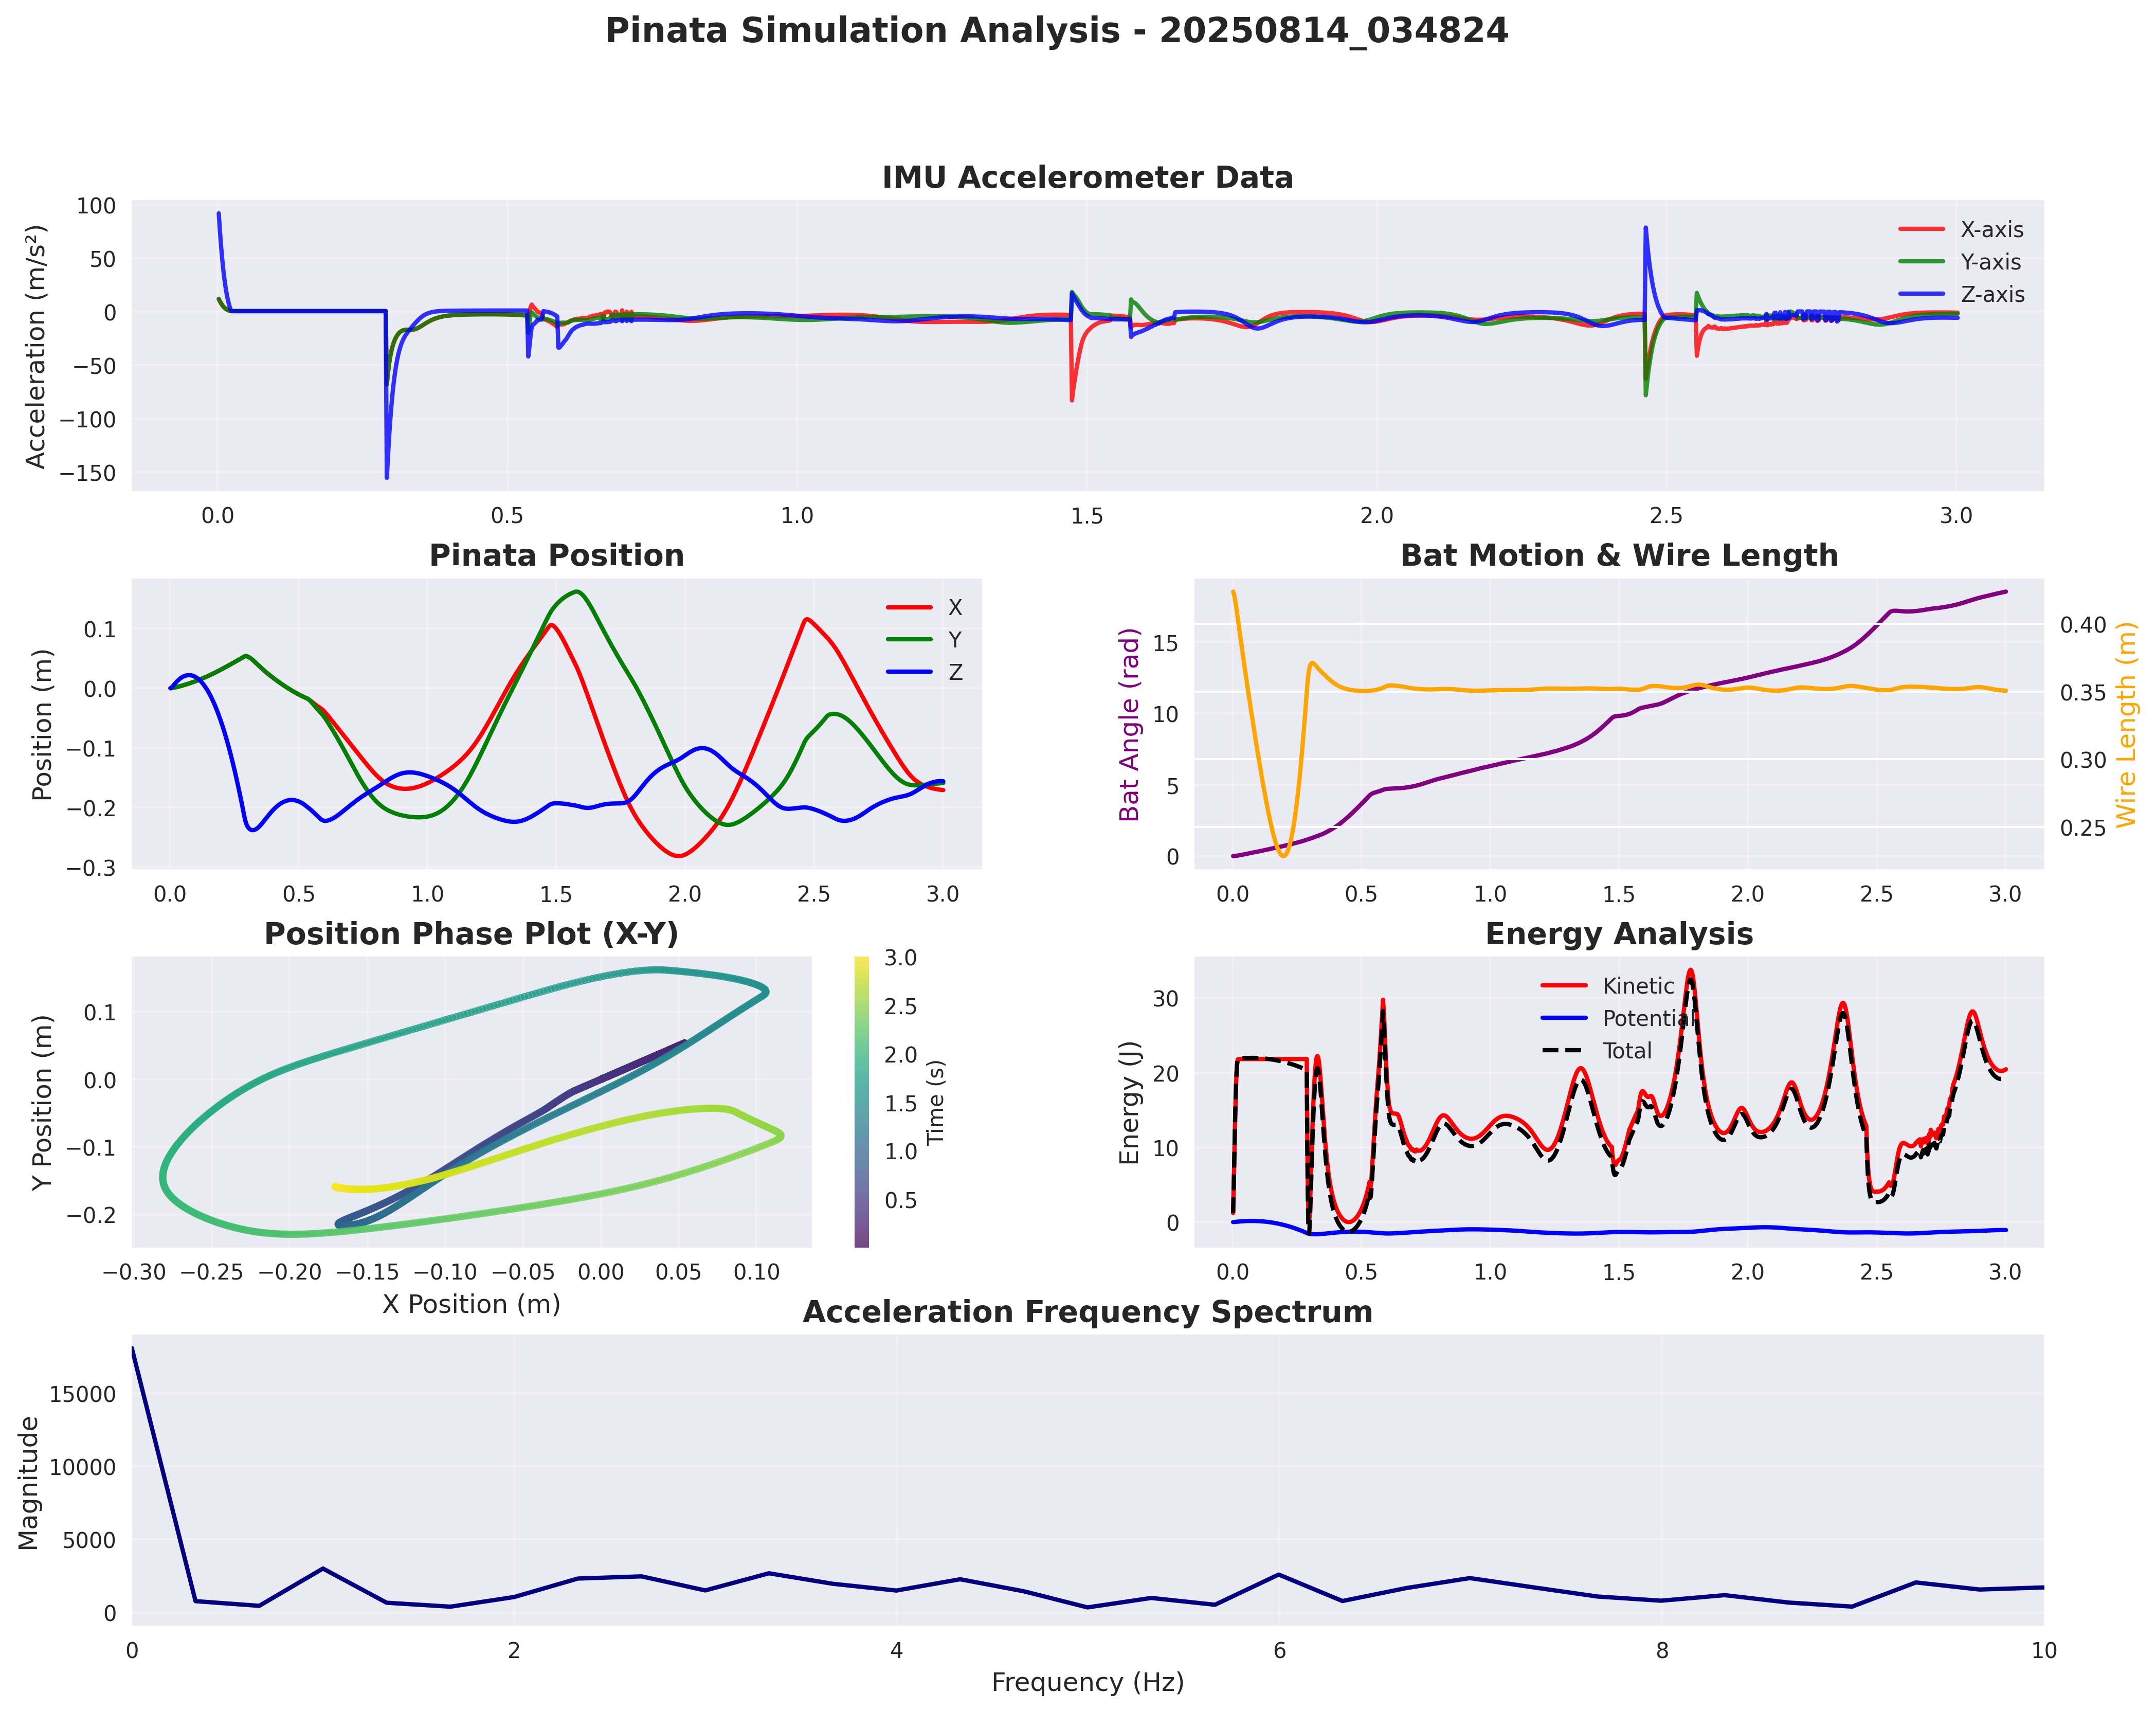


🎥 Displaying videos:
🎬 videos/pinata_simulation_20250814_034824.mp4:
   File size: 0.72 MB


In [16]:
# Create a reusable visualization function
from IPython.display import Image, Video, display


def visualize_run_results(project, run_number, node_id):
    """Display all output files from a run"""
    print(f"📊 Results from Run {run_number} - Node: {node_id}")

    # Get list of output files
    output_files = project.runs.list_node_outputs(run_number, node_id)
    print("📂 Output files:")
    for file in output_files:
        print(f"  - {file}")

    # Get the output path
    output_path = project.runs.get_output_path(run_number, node_id)
    print(f"\n📁 Output directory: {output_path}")
    print(f"Directory exists: {output_path.exists()}")

    if not output_files:
        print("❌ No output files found!")
        return

    # Look for images and videos
    image_files = [f for f in output_files if f.lower().endswith((".png", ".jpg", ".jpeg", ".gif", ".svg"))]
    video_files = [f for f in output_files if f.lower().endswith((".mp4", ".avi", ".mov", ".webm"))]

    print("\n🖼️  Displaying images:")
    for img_file in image_files:
        img_path = output_path / img_file
        if img_path.exists():
            print(f"📷 {img_file}:")
            display(Image(str(img_path), width=800, height=600))
        else:
            print(f"❌ {img_file} not found")

    print("\n🎥 Displaying videos:")
    for vid_file in video_files:
        vid_path = output_path / vid_file
        if vid_path.exists():
            print(f"🎬 {vid_file}:")
            print(f"   File size: {vid_path.stat().st_size / 1024 / 1024:.2f} MB")
            display(Video(str(vid_path.absolute()), width=600, height=400, embed=True))
        else:
            print(f"❌ {vid_file} not found")

    if not image_files and not video_files:
        print("📝 No image or video files found. Available files:")
        for file in output_files:
            file_path = output_path / file
            if file_path.exists():
                print(f"  📄 {file} ({file_path.stat().st_size} bytes)")


# Test the function with the previous run
visualize_run_results(project, run_number, "Mujoco-Simulation")

## 5. Parameter Experiment - Change Motor Strength and Compare Results

Let's increase the motor strength and see what happens. 

In [ ]:
# Step 1: Change the motor strength parameter from 20.0 to 35.0
from fluidize.core.types.parameters import Parameter

print("🔧 Updating motor strength parameter from 20.0 to 35.0...")

# Create updated parameter
new_motor_strength = Parameter(
    name="motor_strength",
    value="35.0",  # Increased from 20.0 to 35.0
    type="text",
    label="Motor Strength",
    description="Control signal strength for bat motor (higher = faster swing, more collision force)",
    scope="simulation",
    location=["source/pinata_simulation.py"],
)

# Update the parameter
project.graph.upsert_parameter("Mujoco-Simulation", new_motor_strength)

# Show the updated parameters
print("\n✅ Parameters updated!")
print(project.graph.show_parameters("Mujoco-Simulation"))

After changing the parameter what you do is exactly the same, just run the flow with one line!

In [ ]:
# Step 2: Run a new simulation with the updated parameters
from fluidize.core.types.runs import RunFlowPayload

print("🚀 Starting new simulation with motor strength = 35.0...")

payload = RunFlowPayload(
    name="high-motor-experiment",
    description="Testing increased motor strength (35.0 vs 20.0)",
    tags=["experiment", "parameter-study", "high-power"],
)

result = project.runs.run_flow(payload)
new_run_number = result["run_number"]

print(f"✅ Simulation started! Run number: {new_run_number}")
print(f"Status: {result['flow_status']}")
print("\n⏳ Wait a moment for simulation to complete, then run the next cell...")

Now we just visualize the results again and see what happened

In [ ]:
# Step 3: Visualize the new results using our reusable function
print("📊 Results from the HIGH motor strength simulation (35.0):")
print("=" * 60)

# Use the new_run_number from the previous cell
visualize_run_results(project, new_run_number, "Mujoco-Simulation")